In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

%matplotlib inline

In [2]:
entrenamiento_df = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')

In [3]:
entrenamiento_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
entrenamiento_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [5]:
entrenamiento_df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
harm                     41
sinking                  41
body%20bags              41
damage                   41
outbreak                 40
twister                  40
windstorm                40
siren                    40
evacuate                 40
fear                     40
collided                 40
earthquake               39
sinkhole                 39
explosion                39
wreckage                 39
derailment               39
weapon                   39
collision                39
famine                   39
flames                   39
sunk                     39
wrecked                  39
hellfire                 39
weapons                  39
whirlwind                39
derailed                 38
typhoon                  38
                         ..
suicide%20bomber         31
trauma                   31
terrorist                31
avalanche                30
bioterrorism        

In [6]:
# Reemplazo el error en el espaciado de las keyword
entrenamiento_df['keyword'] = entrenamiento_df['keyword'].str.replace('%20', ' ')
entrenamiento_df.keyword.value_counts()

fatalities             45
deluge                 42
armageddon             42
harm                   41
damage                 41
body bags              41
sinking                41
outbreak               40
evacuate               40
twister                40
fear                   40
windstorm              40
collided               40
siren                  40
hellfire               39
sinkhole               39
sunk                   39
wrecked                39
famine                 39
collision              39
earthquake             39
derailment             39
weapon                 39
explosion              39
wreckage               39
whirlwind              39
weapons                39
flames                 39
oil spill              38
ambulance              38
                       ..
obliterated            31
trauma                 31
wild fires             31
dead                   30
survivors              30
avalanche              30
catastrophic           30
mayhem      

In [7]:
entrenamiento_df['location'].value_counts()

USA                               104
New York                           71
United States                      50
London                             45
Canada                             29
Nigeria                            28
UK                                 27
Los Angeles, CA                    26
India                              24
Mumbai                             22
Washington, DC                     21
Kenya                              20
Worldwide                          19
Australia                          18
Chicago, IL                        18
California                         17
California, USA                    15
New York, NY                       15
Everywhere                         15
San Francisco                      14
United Kingdom                     14
Florida                            14
Los Angeles                        13
Washington, D.C.                   13
Indonesia                          13
Toronto                            12
NYC         

In [8]:
# Agrupo USA y United States
entrenamiento_df['location'] = entrenamiento_df['location'].replace({'United States':'USA'})
entrenamiento_df['location'].value_counts()

USA                               154
New York                           71
London                             45
Canada                             29
Nigeria                            28
UK                                 27
Los Angeles, CA                    26
India                              24
Mumbai                             22
Washington, DC                     21
Kenya                              20
Worldwide                          19
Chicago, IL                        18
Australia                          18
California                         17
Everywhere                         15
California, USA                    15
New York, NY                       15
San Francisco                      14
Florida                            14
United Kingdom                     14
Los Angeles                        13
Indonesia                          13
Washington, D.C.                   13
NYC                                12
Ireland                            12
Toronto     

In [9]:
entrenamiento_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
test_df = pd.read_csv('setDeDatos/nlp-getting-started/test.csv')
test_df.head(10)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [13]:
# Agrupo USA y United States
test_df['location'] = test_df['location'].replace({'United States':'USA'})
test_df['location'].value_counts()

USA                           52
New York                      38
Worldwide                     16
London                        13
Canada                        13
United Kingdom                12
Kenya                         12
Nigeria                       12
Los Angeles                   11
India                         11
Washington, DC                10
San Francisco                  9
NYC                            9
San Francisco, CA              9
Philippines                    9
Los Angeles, CA                8
California                     8
Seattle, WA                    7
Australia                      7
Singapore                      7
New York, NY                   7
Florida                        7
Mumbai                         6
UK                             6
Melbourne, Australia           6
Chicago                        6
California, USA                6
Paterson, New Jersey           5
Las Vegas                      5
Denver, CO                     5
          

In [12]:
# Reemplazo el error en el espaciado de las keyword
test_df['keyword'] = test_df['keyword'].str.replace('%20', ' ')
test_df.keyword.value_counts()

deluged                23
demolished             22
rubble                 22
first responders       21
snowstorm              21
seismic                21
sirens                 21
annihilation           21
obliteration           21
dead                   20
mayhem                 20
avalanche              20
survivors              20
catastrophic           20
bioterrorism           20
wild fires             19
terrorist              19
crushed                19
hostage                19
obliterated            19
devastated             19
obliterate             19
trauma                 19
suicide bomber         19
trapped                18
blight                 18
drown                  18
apocalypse             18
electrocute            18
hailstorm              18
                       ..
war zone               11
sunk                   11
weapon                 11
famine                 11
hellfire               11
flames                 11
explosion              11
whirlwind   

In [58]:
# 'longitud_text' contiene la longitud de la columna 'text'. 
test_df['text']=test_df['text'].astype(str)
test_df['longitud_text']=test_df.text.str.len()
test_df.head(10)

,id,keyword,location,text,longitud_text
15,46,ablaze,London,Birmingham Wholesale Market is ablaze BBC News...,120
16,47,ablaze,Niall's place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ...,54
17,51,ablaze,NIGERIA,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriag...,109
18,58,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,114
19,60,ablaze,"Los Angeles, Califnordia",PSA: IÛªm splitting my personalities.\n\n?? t...,94
20,69,ablaze,threeonefive.,beware world ablaze sierra leone &amp; guap.,44
21,70,ablaze,Washington State,Burning Man Ablaze! by Turban Diva http://t.co...,67
22,72,ablaze,"Whoop Ass, Georgia",Not a diss song. People will take 1 thing and ...,138
23,75,ablaze,India,Rape victim dies as she sets herself ablaze: A...,137
25,87,ablaze,"scarborough, ontario",@CTVToronto the bins in front of the field by ...,139


In [59]:
#agrego columna: cantidad de palabras de text

test_df['cantidad_palabras']=test_df['text'].apply(lambda x: len(x.split()) )
test_df.head(10)

,id,keyword,location,text,longitud_text,cantidad_palabras
15,46,ablaze,London,Birmingham Wholesale Market is ablaze BBC News...,120,16
16,47,ablaze,Niall's place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ...,54,9
17,51,ablaze,NIGERIA,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriag...,109,10
18,58,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,114,8
19,60,ablaze,"Los Angeles, Califnordia",PSA: IÛªm splitting my personalities.\n\n?? t...,94,13
20,69,ablaze,threeonefive.,beware world ablaze sierra leone &amp; guap.,44,7
21,70,ablaze,Washington State,Burning Man Ablaze! by Turban Diva http://t.co...,67,9
22,72,ablaze,"Whoop Ass, Georgia",Not a diss song. People will take 1 thing and ...,138,28
23,75,ablaze,India,Rape victim dies as she sets herself ablaze: A...,137,21
25,87,ablaze,"scarborough, ontario",@CTVToronto the bins in front of the field by ...,139,29


In [17]:
# 'longitud_text' contiene la longitud de la columna 'text'. 
entrenamiento_df['text']=entrenamiento_df['text'].astype(str)
entrenamiento_df['longitud_text']=entrenamiento_df.text.str.len()
entrenamiento_df.head(10)

,id,keyword,location,text,target,longitud_text
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,122
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,55
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0,22
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,114
42,62,ablaze,milky way,Had an awesome time visiting the CFC head offi...,0,120


In [25]:
#agrego columna: cantidad de palabras de text

entrenamiento_df['cantidad_palabras']=entrenamiento_df['text'].apply(lambda x: len(x.split()) )
entrenamiento_df.head(10)


,id,keyword,location,text,target,longitud_text,cantidad_palabras
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,5
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,10
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,9
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,7
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,13
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,122,21
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,55,8
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0,22,5
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,114,8
42,62,ablaze,milky way,Had an awesome time visiting the CFC head offi...,0,120,24


In [18]:
#eliminar nulos
test_df.dropna(inplace=True)


In [26]:
entrenamiento_df.dropna(inplace=True)

In [21]:
## librerias para entrenar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [27]:
#defino las entradas x e y

x = entrenamiento_df[['longitud_text','cantidad_palabras']].values
y = entrenamiento_df['target'].values
 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/home/gaston/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
# pruebo un valor cualqueira de k
vecinos = 7
 
knn = KNeighborsClassifier(vecinos)
knn.fit(x_train, y_train)
print('Accuracy K-NN en set de entrenamiento: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy K-NN en set de test: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy K-NN en set de entrenamiento: 0.70
Accuracy K-NN en set de test: 0.61


([<matplotlib.axis.XTick at 0x7f9fea367c18>,
 <a list of 13 Text xticklabel objects>)

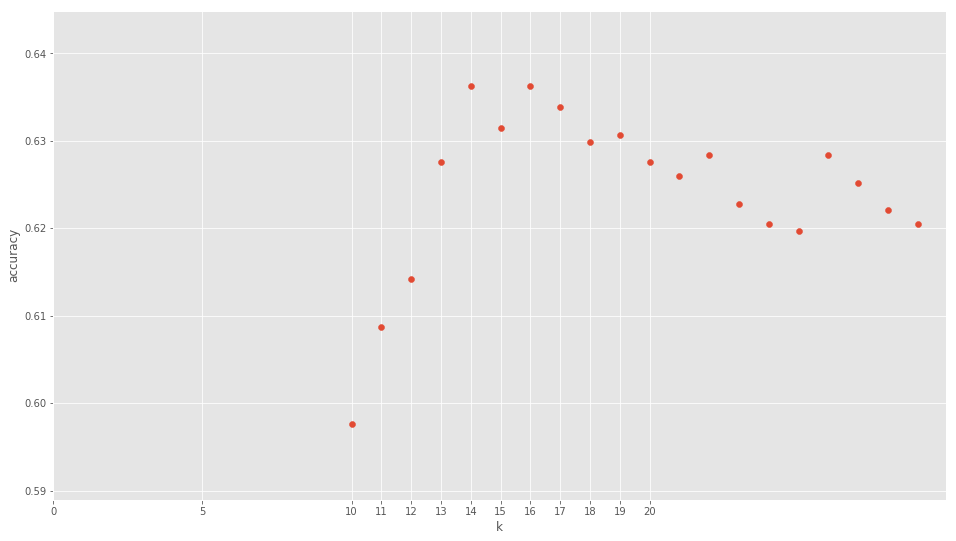

In [53]:
# elegir otros k
k_range = range(10, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,11,12,13,14,15,16,17,18,19,20])

In [54]:
# pruebo k =14
vecinos = 14
 
knn = KNeighborsClassifier(vecinos)
knn.fit(x_train, y_train)
print('Accuracy K-NN en set de entrenamiento: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy K-NN en set de test: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy K-NN en set de entrenamiento: 0.68
Accuracy K-NN en set de test: 0.64


In [56]:
#clasificador
clasificador = KNeighborsClassifier(vecinos, weights='distance')
clasificador.fit(x, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='distance')

In [83]:
#pruebo el modelo
z = np.array(test_df[['longitud_text','cantidad_palabras']])


In [84]:
predictions = clasificador.predict(z)


In [87]:
id_ = test_df['id']
submit = pd.DataFrame()
#submit['id'] = pd.DataFrame(id_)
submit['id'] = test_df['id']
submit['target'] = pd.DataFrame({'target':predictions})
submit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 15 to 3250
Data columns (total 2 columns):
id        2158 non-null int64
target    1441 non-null float64
dtypes: float64(1), int64(1)
memory usage: 50.6 KB


In [88]:
submit.to_csv('Submits_KNN/submit_KNN_14.csv')